In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from isvd import ISVD2
from isvd import ISVD3
from isvd import ISVD4
from isvd import tools
from isvd import scorer

## Load Data

In [3]:
data = scipy.io.loadmat("isvd/data/intv_faces.mat")
Mmin = data["lo"][:10,:]
Mmax = data["up"][:10,:]
Mavg = data["avg"][:10,:]

M_int = np.dstack((Mmin,Mmax))

## Decompose Interval Matrix

In [4]:
isvd = ISVD4(target_rank=5)
u_avg, s_int, v_avg = isvd.fit_return(M_int, decomp_strategy="b")

In [5]:
# Recover matrix
temp = tools.interval_matmul(np.dstack((u_avg, u_avg)), s_int)
m_rec = tools.interval_matmul(temp, np.dstack((v_avg.T, v_avg.T)))

In [6]:
# Calculate accuracy
accuracy = scorer.reconstruction_acc(m_rec, M_int)
print(f"Accuracy score = {accuracy}")

Accuracy score = 0.7649555523528477


## Plot Plot Plot

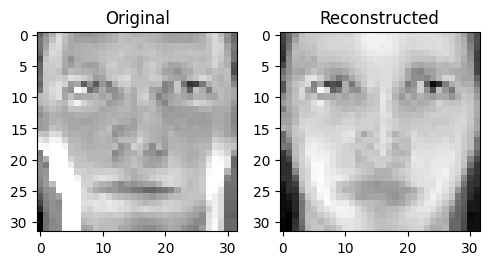

In [13]:
# Upper matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(M_int[0,:,1].reshape(32,32), cmap="gray", vmax=255)
axes[0].set_title("Original")
axes[1].imshow(m_rec[0,:,1].reshape(32,32), cmap="gray", vmax=255)
axes[1].set_title("Reconstructed")
fig.tight_layout()

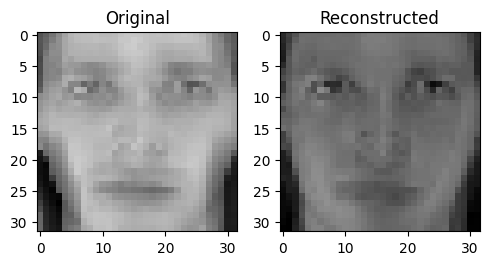

In [14]:
# Lower matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(M_int[0,:,0].reshape(32,32), cmap="gray", vmax=255)
axes[0].set_title("Original")
axes[1].imshow(m_rec[0,:,0].reshape(32,32), cmap="gray", vmax=255)
axes[1].set_title("Reconstructed")
fig.tight_layout()

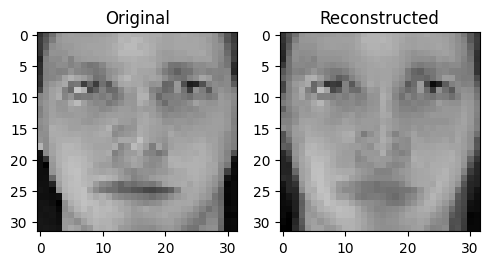

In [16]:
# Average matrix
real_avg = (M_int[:,:,0] + M_int[:,:,1])/2
m_rec_avg = (m_rec[:,:,0] + m_rec[:,:,1])/2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(real_avg[0,:].reshape(32,32), cmap="gray", vmax=255)
axes[0].set_title("Original")
axes[1].imshow(m_rec_avg[0,:].reshape(32,32), cmap="gray", vmax=255)
axes[1].set_title("Reconstructed")
fig.tight_layout()